In [1]:
# Import libraries
import numpy as np
import pandas as pd
from obspy import read
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import os

In [2]:
catalog_lunar_dir = "./data/lunar/data/training/catalogs/apollo12_catalog_GradeA_final.csv"

catalog_lunar = pd.read_csv(catalog_lunar_dir)

catalog_lunar

,filename,time_abs(%Y-%m-%dT%H:%M:%S.%f),time_rel(sec),evid,mq_type
0,xa.s12.00.mhz.1970-01-19HR00_evid00002,1970-01-19T20:25:00.000000,73500.0,evid00002,impact_mq
1,xa.s12.00.mhz.1970-03-25HR00_evid00003,1970-03-25T03:32:00.000000,12720.0,evid00003,impact_mq
2,xa.s12.00.mhz.1970-03-26HR00_evid00004,1970-03-26T20:17:00.000000,73020.0,evid00004,impact_mq
3,xa.s12.00.mhz.1970-04-25HR00_evid00006,1970-04-25T01:14:00.000000,4440.0,evid00006,impact_mq
4,xa.s12.00.mhz.1970-04-26HR00_evid00007,1970-04-26T14:29:00.000000,52140.0,evid00007,deep_mq
...,...,...,...,...,...
71,xa.s12.00.mhz.1974-10-14HR00_evid00156,1974-10-14T17:43:00.000000,63780.0,evid00156,impact_mq
72,xa.s12.00.mhz.1975-04-12HR00_evid00191,1975-04-12T18:15:00.000000,65700.0,evid00191,impact_mq
73,xa.s12.00.mhz.1975-05-04HR00_evid00192,1975-05-04T10:05:00.000000,36300.0,evid00192,impact_mq
74,xa.s12.00.mhz.1975-06-24HR00_evid00196,1975-06-24T16:03:00.000000,57780.0,evid00196,impact_mq


In [3]:
catalog_lunar.columns

Index(['filename', 'time_abs(%Y-%m-%dT%H:%M:%S.%f)', 'time_rel(sec)', 'evid',
       'mq_type'],
      dtype='object')

In [26]:
row = catalog_lunar.iloc[25]
row

filename                          xa.s12.00.mhz.1971-05-23HR00_evid00034
time_abs(%Y-%m-%dT%H:%M:%S.%f)                1971-05-23T22:20:00.000000
time_rel(sec)                                                    80400.0
evid                                                           evid00034
mq_type                                                        impact_mq
Name: 25, dtype: object

In [27]:
arrival_time = datetime.strptime(row["time_abs(%Y-%m-%dT%H:%M:%S.%f)"], '%Y-%m-%dT%H:%M:%S.%f')
arrival_time

datetime.datetime(1971, 5, 23, 22, 20)

In [28]:
arrival_time_relative = row["time_rel(sec)"]
arrival_time_relative

80400.0

In [29]:
test_filename = row.filename
test_filename

'xa.s12.00.mhz.1971-05-23HR00_evid00034'

In [30]:
data_dir = "./data/lunar/data/training/data/Processed/"
csv_file = f'{data_dir}{test_filename}.csv'

In [31]:
data_catalog = pd.read_csv(csv_file)
data_catalog

,time_abs(%Y-%m-%dT%H:%M:%S.%f),time_rel(sec),velocity(m/s)
0,1971,0.000000,0.0
1,1971,0.150943,0.0
2,1971,0.301887,0.0
3,1971,0.452830,0.0
4,1971,0.603774,0.0
...,...,...,...
572418,1971,86402.716981,0.0
572419,1971,86402.867925,0.0
572420,1971,86403.018868,0.0
572421,1971,86403.169811,0.0


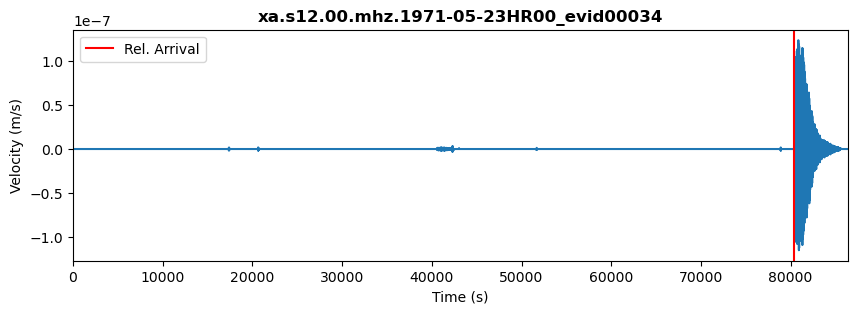

In [32]:
csv_times = np.array(data_catalog["time_rel(sec)"].tolist())
csv_velocity = np.array(data_catalog["velocity(m/s)"].tolist())

# Plot the trace!
fig,ax = plt.subplots(1,1,figsize=(10,3))
ax.plot(csv_times,csv_velocity)
# Make the plot pretty
ax.set_xlim([min(csv_times),max(csv_times)])
ax.set_ylabel('Velocity (m/s)')
ax.set_xlabel('Time (s)')
ax.set_title(f'{test_filename}', fontweight='bold')
# Plot where the arrival time is
arrival_line = ax.axvline(x=arrival_time_relative, c='red', label='Rel. Arrival')
ax.legend(handles=[arrival_line])

Function

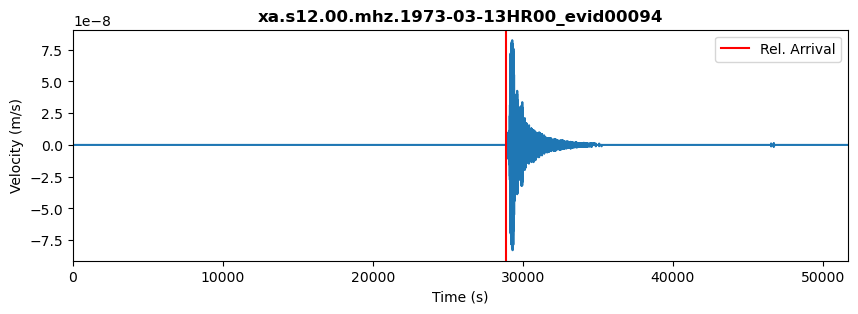

In [36]:

catalog_lunar_dir = "./data/lunar/data/training/catalogs/apollo12_catalog_GradeA_final.csv"
data_dir = "./data/lunar/data/training/data/Processed/"
row_num = 45

def plot_catalogued_data(catalog_dir, data_dir, row_num):
    catalog_lunar = pd.read_csv(catalog_lunar_dir)
    row = catalog_lunar.iloc[row_num]
    arrival_time_relative = row["time_rel(sec)"]
    test_filename = row.filename
    csv_file = f'{data_dir}{test_filename}.csv'
    data_catalog = pd.read_csv(csv_file)

    csv_times = np.array(data_catalog["time_rel(sec)"].tolist())
    csv_velocity = np.array(data_catalog["velocity(m/s)"].tolist())

    # Plot the trace!
    fig,ax = plt.subplots(1,1,figsize=(10,3))
    ax.plot(csv_times,csv_velocity)
    # Make the plot pretty
    ax.set_xlim([min(csv_times),max(csv_times)])
    ax.set_ylabel('Velocity (m/s)')
    ax.set_xlabel('Time (s)')
    ax.set_title(f'{test_filename}', fontweight='bold')
    # Plot where the arrival time is
    arrival_line = ax.axvline(x=arrival_time_relative, c='red', label='Rel. Arrival')
    ax.legend(handles=[arrival_line])

    


plot_catalogued_data(catalog_lunar_dir, data_dir, row_num)


Function to Plot according to chunk

In [34]:
def plot_chunk(chunk):
    csv_times = np.array(chunk["time_rel(sec)"].tolist())
    csv_velocities = np.array(chunk["velocity(m/s)"].tolist())

    # Plot the trace!
    fig,ax = plt.subplots(1,1,figsize=(10,3))
    ax.plot(csv_times,csv_velocities)
    # Make the plot pretty
    ax.set_xlim([min(csv_times),max(csv_times)])
    ax.set_ylabel('Velocity (m/s)')
    ax.set_xlabel('Time (s)')
    
    